# **Checkpoint 3**
# Dataset ini diperoleh dari [Kaggle - Amazon Monitor Sales](https://www.kaggle.com/datasets/durjoychandrapaul/amazon-products-sales-monitor-dataset)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/content/extracted_product_info_amazon.csv")

In [5]:
df

,Title,Brand,Screen Size,Resolution,Aspect Ratio,Rating,Price
0,"acer SB240Y G0bi 23.8"" IPS Full HD Ultra-Slim ...",acer,23.8 Inches,FHD 1080p,16:9,4.4,94.99
1,"acer Nitro 31.5"" FHD 1920 x 1080 1500R Curved ...",acer,31.5 Inches,FHD 1080p,16:9,4.6,259.99
2,"Acer SB272 EBI 27"" Full HD (1920 x 1080) IPS Z...",acer,27 Inches,FHD 1080p,16:9,4.5,99.99
3,Sceptre 30-inch Curved Gaming Monitor 21:9 256...,Sceptre,30 Inches,FHD 1080p Ultra Wide,21:9,4.5,199.97
4,"SAMSUNG 32"" UJ59 Series 4K UHD (3840x2160) Com...",SAMSUNG,31.5 Inches,4K UHD 2160p,16:9,4.3,279.99
...,...,...,...,...,...,...,...
942,"acer SB270 G0bi 27"" IPS Full HD (1920 x 1080) ...",acer,27 Inches,FHD 1080p,16:9,4.5,147.35
943,"ASUS 31.5” 1080P Monitor (VA329HE) - Full HD, ...",ASUS,32 Inches,FHD 1080p,16:9,4.5,157.99
944,"Acer Predator XB273K V3bmiiprx 27"" UHD 3840x21...",acer,27 Inches,4K UHD 2160p,16:9,4.4,399.99
945,"Acer Nitro 34"" UWQHD 3440 x 1440 1500R Curved ...",acer,34 Inches,QHD Ultra Wide 1440p,21:9,4.6,299.99


# 1. Visualisasi Data yang Relevan dengan Business Understanding

Tujuan studi kasus: Menganalisis pola pembelian monitor di Amazon.

## Distribusi Harga Monitor

In [16]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

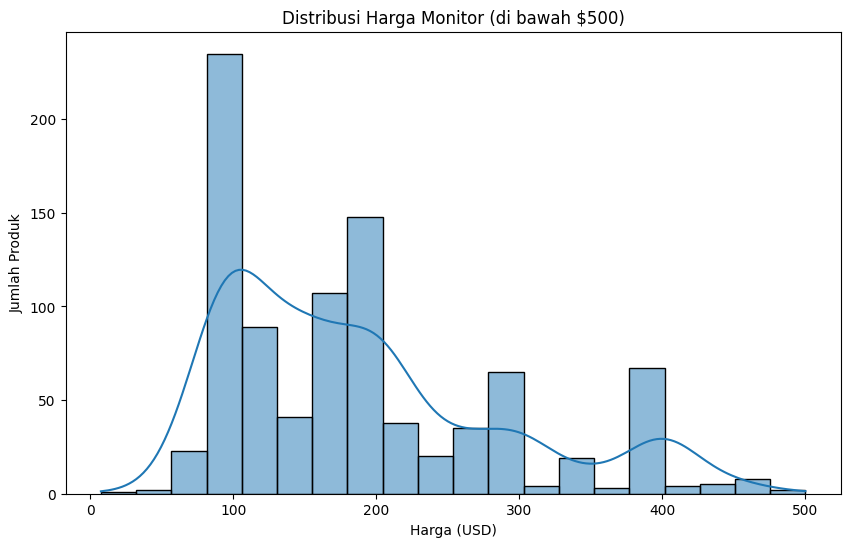

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['Price'] < 500]['Price'], bins=20, kde=True)
plt.title('Distribusi Harga Monitor (di bawah $500)')
plt.xlabel('Harga (USD)')
plt.ylabel('Jumlah Produk')
plt.show()

## Jumlah Produk per Brand

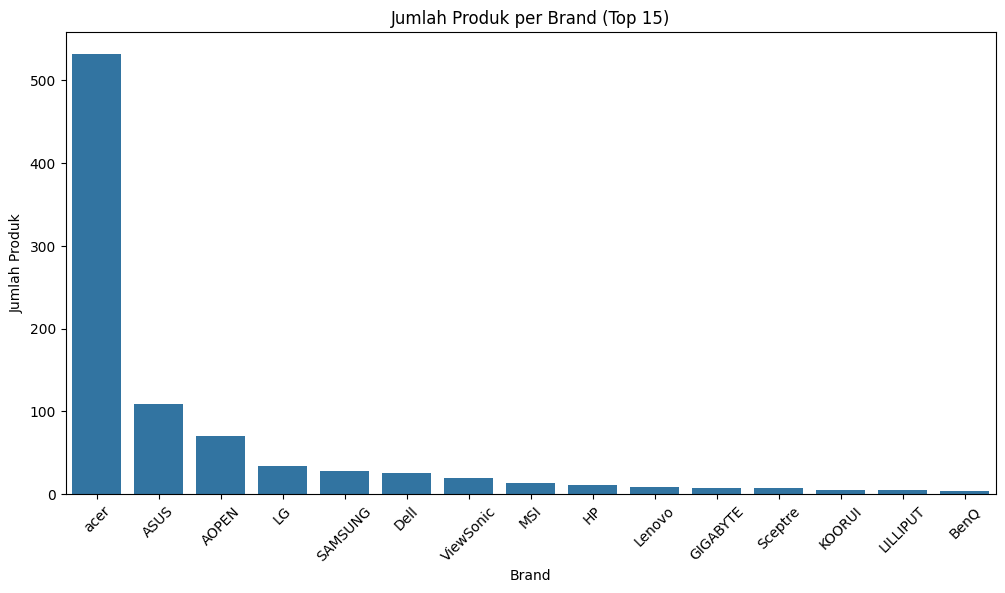

In [18]:
top_brands = df['Brand'].value_counts().nlargest(15).index
plt.figure(figsize=(12,6))
sns.countplot(data=df[df['Brand'].isin(top_brands)], x='Brand', order=top_brands)
plt.title('Jumlah Produk per Brand (Top 15)')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Produk')
plt.show()

## Boxplot Harga per Brand

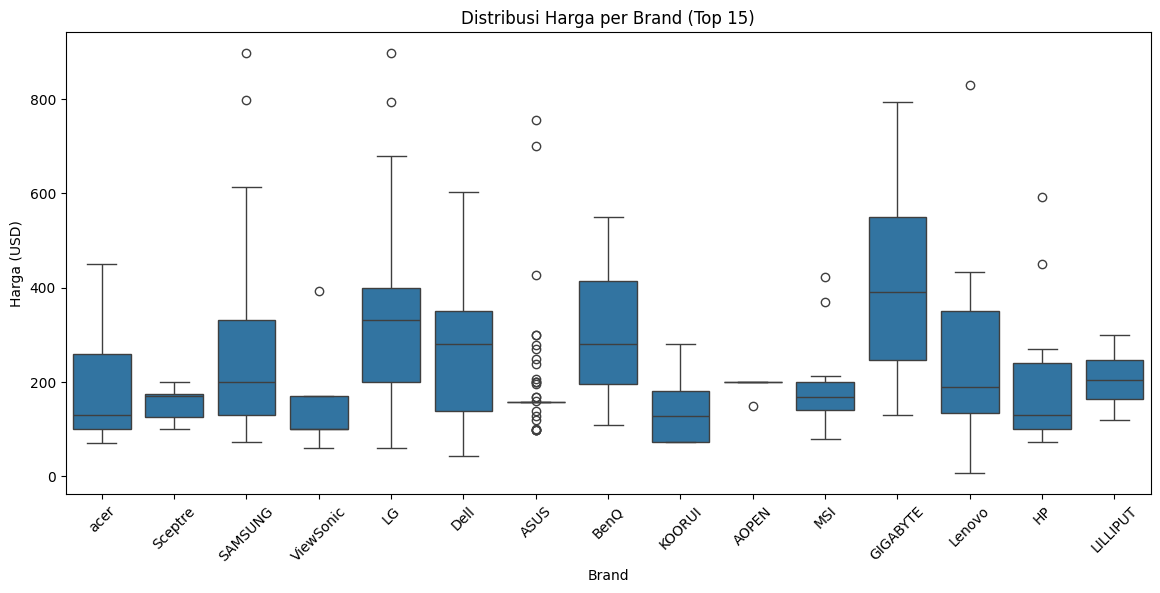

In [19]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df[df['Brand'].isin(top_brands)], x='Brand', y='Price')
plt.title('Distribusi Harga per Brand (Top 15)')
plt.xticks(rotation=45)
plt.ylabel('Harga (USD)')
plt.show()

## Jumlah Produk Berdasarkan Resolusi

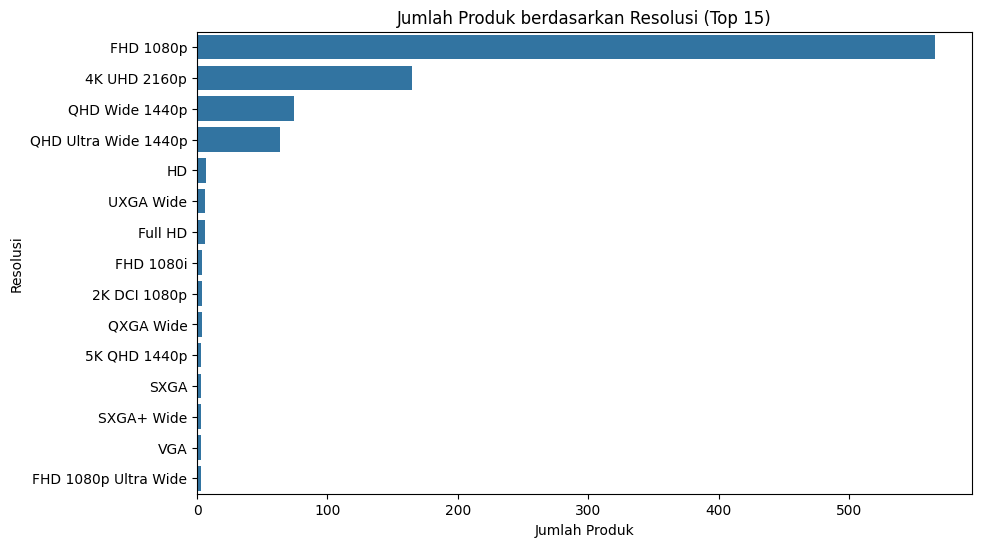

In [21]:
top_res = df['Resolution'].value_counts().nlargest(15).index
plt.figure(figsize=(10,6))
sns.countplot(data=df[df['Resolution'].isin(top_res)], y='Resolution', order=top_res)
plt.title('Jumlah Produk berdasarkan Resolusi (Top 15)')
plt.xlabel('Jumlah Produk')
plt.ylabel('Resolusi')
plt.show()

## Harga vs Rating Produk (15 Brand saja ditampilkan)

In [24]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df.dropna(subset=['Rating'])

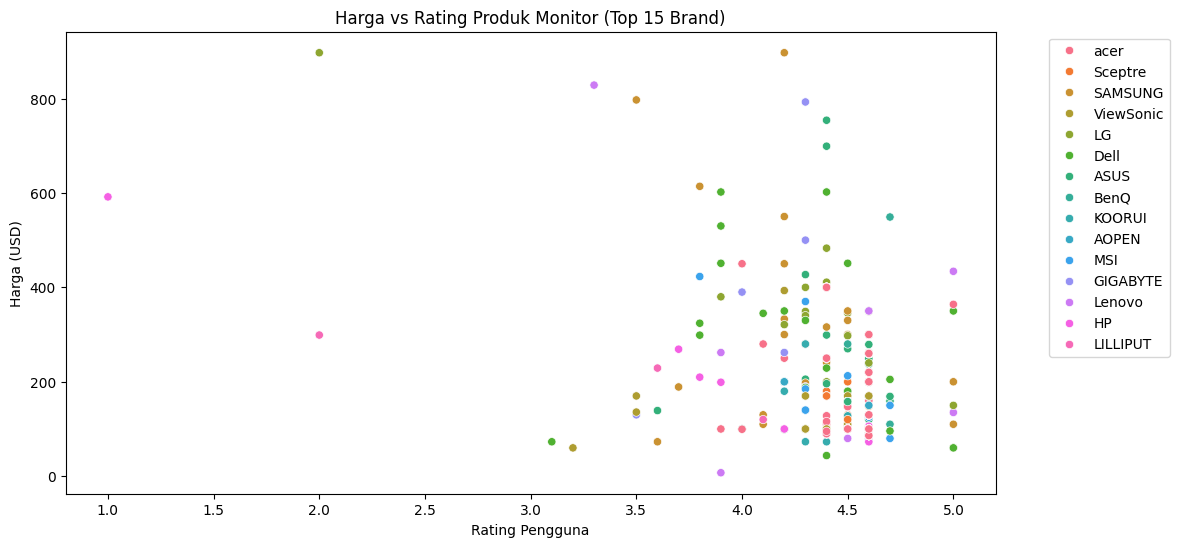

In [25]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df[df['Brand'].isin(top_brands)], x='Rating', y='Price', hue='Brand')
plt.title('Harga vs Rating Produk Monitor (Top 15 Brand)')
plt.xlabel('Rating Pengguna')
plt.ylabel('Harga (USD)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 2. insight dan tindakan yang dapat diambil berdasarkan hasil visualisasi yang dibuat

1. Distribusi Harga Monitor (< 500 dollar)
*   Sebagian besar produk berada di bawah $500, menandakan pasar lebih sensitif terhadap harga.
*   Perusahaan bisa mengarahkan strategi bundling dan diskon untuk menarik konsumen di segmen harga ini.

2. Jumlah Produk per Brand
*   Brand dengan jumlah produk terbanyak menunjukkan dominasi pasar.
*   Fokus pemasaran dapat diarahkan pada brand yang paling aktif atau paling banyak menjual produk.

3. Boxplot Harga per Brand
*   Beberapa brand memiliki harga median yang jauh lebih tinggi dibandingkan lainnya, menunjukkan positioning produk premium.
*   Variasi harga yang lebar menunjukkan adanya segmen pasar yang beragam.
*   Brand dengan harga lebih rendah bisa digunakan untuk strategi promosi entry-level.

4. Produk Berdasarkan Resolusi
*   Resolusi FHD dan 4K menjadi mayoritas, menunjukkan preferensi pengguna terhadap kualitas visual yang tinggi.
*   Resolusi dapat dijadikan salah satu fitur unggulan dalam kampanye produk.

5. Harga vs Rating Produk
*   Tidak semua produk mahal mendapat rating tinggi.
*   Beberapa brand dengan harga menengah memiliki rating yang lebih baik, artinya kualitas dan kepuasan tidak selalu berbanding lurus dengan harga.
*   Evaluasi kualitas produk bisa ditingkatkan untuk memperkuat loyalitas pengguna.